In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-23 12:52:06.753412: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-23 12:52:08.472066: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-23 12:52:08.711496: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:52:08.714055: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:52:08.714074: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-2

In [3]:
help(gp2.UNetPLUS)

Help on class UNetPLUS in module gp2.gp2.unet_plus:

class UNetPLUS(gp2.gp2.classifier.Classifier)
 |  UNetPLUS(input_shape=(512, 512, 1), num_classes=1, base_filters=4, dropout=0.1, batchnorm=True, activation='relu', kernel_size=3, padding='same', strides=1, depth=4, num_layers=4, optimizer=None, loss=None, metrics=None, name='unetplus', verbose=True, workingdir='/tmp')
 |  
 |  Method resolution order:
 |      UNetPLUS
 |      gp2.gp2.classifier.Classifier
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_shape=(512, 512, 1), num_classes=1, base_filters=4, dropout=0.1, batchnorm=True, activation='relu', kernel_size=3, padding='same', strides=1, depth=4, num_layers=4, optimizer=None, loss=None, metrics=None, name='unetplus', verbose=True, workingdir='/tmp')
 |      Initialize the KerasUNet class.
 |      
 |      Parameters
 |      ----------
 |      input_shape : tuple
 |          The shape of the input image.
 |      num_classes : int
 |          T

In [4]:
R = Runner(verbose=True, 
           classifier='unetplus', 
           base_filters=8,
           dropout=0.1,
           batchnorm=True,
           activation='ReLU',
           kernel_size=3,
           padding='same',
           depth=4,
           num_layers=4,
           optimizer=None,
           loss=None,
           metrics=None         
          )

2023-04-23 12:52:23.779302: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 12:52:23.992221: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:52:23.994635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-23 12:52:24.004137: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible 

Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmpu9j0u1irGP2', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f7dda806df0>, 'loss': <function binary_crossentropy at 0x7f7de4c2b040>, 'metrics': [<tensorflow.python.eager.def_function.Function object at 0x7f7dda840c40>], 'input_shape': (512, 512, 1), 'num_classes': 1, 'base_filters': 8, 'dropout': 0.1, 'batchnorm': True, 'activation': 'ReLU', 'kernel_size': 3, 'padding': 'same', 'strides': 1, 'depth': 4, 'num_layers': 4, 'name': 'unetplus', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f7dd00e4730>}
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
_________________________________________________________________

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=5)    

Weights OK!
******
Loop 0


2023-04-23 12:52:45.572434: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-23 12:52:45.590991: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-23 12:52:50.602151: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-23 12:52:51.347980: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-23 12:52:52.094306: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-23 12:52:52.094333: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-23 12:52:52.094389: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-23 12:52:52.109889: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-23 12:52:52.899842: I tensorflow/stream_exec

4/4 [==============================] - 21s 3s/step - loss: 0.5917 - dice_coef: 0.1551 - val_loss: 0.5838 - val_dice_coef: 0.1586


2023-04-23 12:53:11.629095: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.5905 - dice_coef: 0.1559 - val_loss: 0.5848 - val_dice_coef: 0.1587
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: 0.5893 - dice_coef: 0.1565 - val_loss: 0.5854 - val_dice_coef: 0.1588
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.5885 - dice_coef: 0.1572 - val_loss: 0.5862 - val_dice_coef: 0.1589
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.5874 - dice_coef: 0.1577 - val_loss: 0.5872 - val_dice_coef: 0.1590
Epoch 6/100
4/4 [==============================] - 4s 1s/step - loss: 0.5865 - dice_coef: 0.1585 - val_loss: 0.5880 - val_dice_coef: 0.1590
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.5858 - dice_coef: 0.1590 - val_loss: 0.5889 - val_dice_coef: 0.1591
Epoch 8/100
4/4 [==============================] - 4s 1s/step - loss: 0.5850 - dice_coef: 0.1597 - val_loss: 0.5898 - val_dice_coef: 0.1592
Epoch 9/100
4/4 [===

4/4 [==============================] - 4s 1s/step - loss: 0.5178 - dice_coef: 0.1916 - val_loss: 0.6820 - val_dice_coef: 0.1632
Epoch 61/100
4/4 [==============================] - 4s 1s/step - loss: 0.5169 - dice_coef: 0.1920 - val_loss: 0.6820 - val_dice_coef: 0.1632
Epoch 62/100
4/4 [==============================] - 4s 1s/step - loss: 0.5160 - dice_coef: 0.1920 - val_loss: 0.6817 - val_dice_coef: 0.1633
Epoch 63/100
4/4 [==============================] - 4s 1s/step - loss: 0.5151 - dice_coef: 0.1921 - val_loss: 0.6812 - val_dice_coef: 0.1634
Epoch 64/100
4/4 [==============================] - 5s 1s/step - loss: 0.5143 - dice_coef: 0.1922 - val_loss: 0.6811 - val_dice_coef: 0.1634
Epoch 65/100
4/4 [==============================] - 4s 1s/step - loss: 0.5134 - dice_coef: 0.1924 - val_loss: 0.6805 - val_dice_coef: 0.1635
Epoch 66/100
4/4 [==============================] - 4s 1s/step - loss: 0.5126 - dice_coef: 0.1927 - val_loss: 0.6785 - val_dice_coef: 0.1638
Epoch 67/100
4/4 [========

Replacing 49 from 149 !
D_relabeled_ 49
selected_ids ['17c00051-4c76-48b9-9a31-a5e3bb26bbaa', '21175247-5510-4d24-88ad-024f36dd78f7', 'e1ed2d42-1a8b-4369-85b4-78d3229ff695', 'fe1d60b4-ee21-4a14-bd6d-88740b09641e', '13a55508-40a4-4ecc-9f82-4ba75ad18a3e', 'f305b1d9-854b-4570-bd43-00bbd319239c', '82e1c621-a0e1-4a5e-b15c-4fb5f1818352', '038ae56f-5e38-404a-9fc8-3f9dea8d8a28', '76615a2c-7939-422e-9ca0-da9bdd0d9b74', '7df9d7cf-2eb2-4ecc-b973-d4b089894ffa', '7ae64995-696f-4c5f-83b0-bc3769dda4a0', '93fd3dc0-c48f-400b-9e38-281141b85621', 'b231a209-b2b9-4f33-90c8-daa580ab7a98', '9dcb4f69-f1a0-427b-9444-d7d1822060ec', 'abd45f6d-ed43-4df5-a624-61f9dce86052', 'ac638bec-faf5-477c-8bd8-8746c4c3750e', 'e0522ee7-a475-450f-87f0-1f9cbdf7d363', '118f9f80-b2fa-43b7-97cd-f6eaab314f3e', '5fe8c50d-f227-4bb8-9ab6-e45a71174090', '4d713d3e-db6b-4651-993f-7052c9e468b0', '06770f1b-db6c-415f-b366-9055a6668445', '3cc27acc-d795-4805-b715-52689ce15cf2', '05c7da0d-d5aa-4b9c-b87a-3002c8a5ab7a', 'a85d425b-a7ca-477b-99d8-6

Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.4859 - dice_coef: 0.1977 - val_loss: 0.6391 - val_dice_coef: 0.1694
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.4852 - dice_coef: 0.1979 - val_loss: 0.6359 - val_dice_coef: 0.1699
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.4845 - dice_coef: 0.1977 - val_loss: 0.6383 - val_dice_coef: 0.1695
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.4836 - dice_coef: 0.1980 - val_loss: 0.6415 - val_dice_coef: 0.1687
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.4828 - dice_coef: 0.1979 - val_loss: 0.6450 - val_dice_coef: 0.1681
Epoch 7/100
5/5 [==============================] - 5s 1s/step - loss: 0.4819 - dice_coef: 0.1988 - val_loss: 0.6395 - val_dice_coef: 0.1690
Epoch 8/100
5/5 [==============================] - 5s 1s/step - loss: 0.4812 - dice_coef: 0.1983 - val_loss: 0.6210 - val_dice_coef: 0.1723


Epoch 9/100
5/5 [==============================] - 5s 1s/step - loss: 0.4805 - dice_coef: 0.1984 - val_loss: 0.6312 - val_dice_coef: 0.1705
Epoch 10/100
5/5 [==============================] - 5s 1s/step - loss: 0.4796 - dice_coef: 0.1990 - val_loss: 0.6307 - val_dice_coef: 0.1706
Epoch 11/100
5/5 [==============================] - 5s 1s/step - loss: 0.4787 - dice_coef: 0.1990 - val_loss: 0.6252 - val_dice_coef: 0.1715
Epoch 12/100
5/5 [==============================] - 5s 1s/step - loss: 0.4782 - dice_coef: 0.1988 - val_loss: 0.6178 - val_dice_coef: 0.1728


Epoch 13/100
5/5 [==============================] - 5s 1s/step - loss: 0.4772 - dice_coef: 0.1990 - val_loss: 0.6268 - val_dice_coef: 0.1710
Epoch 14/100
5/5 [==============================] - 5s 1s/step - loss: 0.4765 - dice_coef: 0.1993 - val_loss: 0.6223 - val_dice_coef: 0.1718
Epoch 15/100
5/5 [==============================] - 5s 1s/step - loss: 0.4758 - dice_coef: 0.1998 - val_loss: 0.6322 - val_dice_coef: 0.1701
Epoch 16/100
5/5 [==============================] - 5s 1s/step - loss: 0.4750 - dice_coef: 0.2001 - val_loss: 0.6227 - val_dice_coef: 0.1717
Epoch 17/100
5/5 [==============================] - 5s 1s/step - loss: 0.4746 - dice_coef: 0.2000 - val_loss: 0.6207 - val_dice_coef: 0.1720
Epoch 18/100
5/5 [==============================] - 5s 1s/step - loss: 0.4737 - dice_coef: 0.2001 - val_loss: 0.6255 - val_dice_coef: 0.1712
Epoch 19/100
5/5 [==============================] - 5s 1s/step - loss: 0.4731 - dice_coef: 0.2007 - val_loss: 0.5950 - val_dice_coef: 0.1767


Epoch 20/100
5/5 [==============================] - 5s 1s/step - loss: 0.4722 - dice_coef: 0.2007 - val_loss: 0.5722 - val_dice_coef: 0.1811


Epoch 21/100
5/5 [==============================] - 5s 1s/step - loss: 0.4716 - dice_coef: 0.2008 - val_loss: 0.5847 - val_dice_coef: 0.1784
Epoch 22/100
5/5 [==============================] - 5s 1s/step - loss: 0.4709 - dice_coef: 0.2003 - val_loss: 0.6057 - val_dice_coef: 0.1745
Epoch 23/100
5/5 [==============================] - 5s 1s/step - loss: 0.4702 - dice_coef: 0.2007 - val_loss: 0.6128 - val_dice_coef: 0.1732
Epoch 24/100
5/5 [==============================] - 5s 1s/step - loss: 0.4694 - dice_coef: 0.2007 - val_loss: 0.6265 - val_dice_coef: 0.1707
Epoch 25/100
5/5 [==============================] - 5s 1s/step - loss: 0.4689 - dice_coef: 0.2017 - val_loss: 0.6346 - val_dice_coef: 0.1693
Epoch 26/100
5/5 [==============================] - 5s 1s/step - loss: 0.4679 - dice_coef: 0.2012 - val_loss: 0.6312 - val_dice_coef: 0.1699
Epoch 27/100
5/5 [==============================] - 5s 1s/step - loss: 0.4673 - dice_coef: 0.2014 - val_loss: 0.6209 - val_dice_coef: 0.1717
Epoch 28/100


5/5 [==============================] - 5s 1s/step - loss: 0.4383 - dice_coef: 0.2071 - val_loss: 0.6552 - val_dice_coef: 0.1640
Epoch 80/100
5/5 [==============================] - 5s 1s/step - loss: 0.4376 - dice_coef: 0.2077 - val_loss: 0.6546 - val_dice_coef: 0.1641
Epoch 81/100
5/5 [==============================] - 5s 1s/step - loss: 0.4372 - dice_coef: 0.2084 - val_loss: 0.6506 - val_dice_coef: 0.1648
Epoch 82/100
5/5 [==============================] - 5s 1s/step - loss: 0.4367 - dice_coef: 0.2083 - val_loss: 0.6542 - val_dice_coef: 0.1642
Epoch 83/100
5/5 [==============================] - 5s 1s/step - loss: 0.4362 - dice_coef: 0.2086 - val_loss: 0.6570 - val_dice_coef: 0.1637
Epoch 84/100
5/5 [==============================] - 5s 1s/step - loss: 0.4358 - dice_coef: 0.2087 - val_loss: 0.6541 - val_dice_coef: 0.1639
Epoch 85/100
5/5 [==============================] - 5s 1s/step - loss: 0.4356 - dice_coef: 0.2087 - val_loss: 0.6538 - val_dice_coef: 0.1639
Epoch 86/100
5/5 [========

Replacing 51 from 155 !
D_relabeled_ 51
selected_ids ['7bc8ee17-a10c-402e-bc5f-3d5e6eb66405', '8902b9b2-8531-47ba-9a02-8d0e47a56712', '423b7250-5ebb-4243-a6dc-45913c86e8ed', 'd2b8a5e3-cb5a-4008-9ba5-4ef9a1cbe06f', '8d3b7da2-9be6-463b-b1f0-2185bff96db9', '5f8dc563-0009-4796-a86d-e52e6a81a276', '86081b9b-f36f-4633-b0f7-9bbb74874d91', 'f02b7006-babc-48a0-942b-a1bd95daf4d5', '2d0aaf07-2ba7-40ed-83ae-ce1842154009', '6b3017d5-5e46-4de0-8f70-05fcdcb248f2', '7be8ce46-5a7b-4277-89ae-4cfd97b8724e', '4d68740a-95c8-4a9f-abe7-0221006abb1f', 'a95998f8-223f-4182-a608-3bef9535eca6', '684af3ee-daef-442f-abf1-dd49f99e367b', '1be61048-1502-4b21-8df1-adfbc3b050fc', 'b3c839f6-bfa6-4c24-b2e8-17e1dcf1bc25', '4c54d4f1-0caa-4f90-bba3-7ef9be862c2a', 'bc850a1a-9495-4fd3-aad1-8665b1a72fad', 'b3035269-a5d0-4a59-9c7e-d31f7fdba0e4', 'f4533557-e88d-419d-9ec4-8a9bbb1f7eed', '9eb5b1aa-93c8-4b89-9b36-604c21c44f8c', 'a114bea4-b4b9-4d57-8019-a8bdf8c60314', '1c522312-4050-48f6-9b1d-62af44d82d4f', 'f2447df0-0402-4fb7-a985-b

Epoch 2/100
6/6 [==============================] - 6s 996ms/step - loss: 0.4284 - dice_coef: 0.2111 - val_loss: 0.6538 - val_dice_coef: 0.1634


Epoch 3/100
6/6 [==============================] - 6s 1s/step - loss: 0.4281 - dice_coef: 0.2122 - val_loss: 0.6474 - val_dice_coef: 0.1644


Epoch 4/100
6/6 [==============================] - 6s 1s/step - loss: 0.4275 - dice_coef: 0.2110 - val_loss: 0.6523 - val_dice_coef: 0.1635
Epoch 5/100
6/6 [==============================] - 6s 984ms/step - loss: 0.4271 - dice_coef: 0.2124 - val_loss: 0.6527 - val_dice_coef: 0.1635
Epoch 6/100
6/6 [==============================] - 6s 996ms/step - loss: 0.4266 - dice_coef: 0.2119 - val_loss: 0.6519 - val_dice_coef: 0.1636
Epoch 7/100
6/6 [==============================] - 6s 993ms/step - loss: 0.4263 - dice_coef: 0.2111 - val_loss: 0.6540 - val_dice_coef: 0.1633
Epoch 8/100
6/6 [==============================] - 6s 986ms/step - loss: 0.4258 - dice_coef: 0.2114 - val_loss: 0.6527 - val_dice_coef: 0.1633
Epoch 9/100
6/6 [==============================] - 6s 992ms/step - loss: 0.4254 - dice_coef: 0.2127 - val_loss: 0.6529 - val_dice_coef: 0.1632
Epoch 10/100
6/6 [==============================] - 6s 990ms/step - loss: 0.4249 - dice_coef: 0.2117 - val_loss: 0.6533 - val_dice_coef: 0.1631
E

Epoch 12/100
6/6 [==============================] - 6s 1s/step - loss: 0.4240 - dice_coef: 0.2124 - val_loss: 0.6419 - val_dice_coef: 0.1651


Epoch 13/100
6/6 [==============================] - 6s 1s/step - loss: 0.4235 - dice_coef: 0.2121 - val_loss: 0.6463 - val_dice_coef: 0.1643
Epoch 14/100
6/6 [==============================] - 6s 997ms/step - loss: 0.4230 - dice_coef: 0.2116 - val_loss: 0.6401 - val_dice_coef: 0.1654


Epoch 15/100
6/6 [==============================] - 6s 1s/step - loss: 0.4226 - dice_coef: 0.2129 - val_loss: 0.6273 - val_dice_coef: 0.1675


Epoch 16/100
6/6 [==============================] - 6s 1s/step - loss: 0.4221 - dice_coef: 0.2122 - val_loss: 0.6489 - val_dice_coef: 0.1636
Epoch 17/100
6/6 [==============================] - 6s 1s/step - loss: 0.4217 - dice_coef: 0.2126 - val_loss: 0.6519 - val_dice_coef: 0.1631
Epoch 18/100
6/6 [==============================] - 6s 1s/step - loss: 0.4213 - dice_coef: 0.2121 - val_loss: 0.6463 - val_dice_coef: 0.1640
Epoch 19/100
6/6 [==============================] - 6s 1s/step - loss: 0.4208 - dice_coef: 0.2140 - val_loss: 0.6415 - val_dice_coef: 0.1649
Epoch 20/100
6/6 [==============================] - 6s 998ms/step - loss: 0.4203 - dice_coef: 0.2127 - val_loss: 0.6444 - val_dice_coef: 0.1643
Epoch 21/100
6/6 [==============================] - 6s 997ms/step - loss: 0.4199 - dice_coef: 0.2128 - val_loss: 0.6465 - val_dice_coef: 0.1640
Epoch 22/100
6/6 [==============================] - 6s 1s/step - loss: 0.4195 - dice_coef: 0.2126 - val_loss: 0.6449 - val_dice_coef: 0.1642
Epoch 2

Epoch 28/100
6/6 [==============================] - 6s 1s/step - loss: 0.4169 - dice_coef: 0.2136 - val_loss: 0.6350 - val_dice_coef: 0.1657
Epoch 29/100
6/6 [==============================] - 6s 987ms/step - loss: 0.4166 - dice_coef: 0.2140 - val_loss: 0.6212 - val_dice_coef: 0.1681
Epoch 30/100
6/6 [==============================] - 6s 994ms/step - loss: 0.4161 - dice_coef: 0.2142 - val_loss: 0.6208 - val_dice_coef: 0.1679
Epoch 31/100
6/6 [==============================] - 6s 993ms/step - loss: 0.4158 - dice_coef: 0.2141 - val_loss: 0.6362 - val_dice_coef: 0.1651
Epoch 32/100
6/6 [==============================] - 6s 1s/step - loss: 0.4154 - dice_coef: 0.2137 - val_loss: 0.6327 - val_dice_coef: 0.1658
Epoch 33/100
6/6 [==============================] - 6s 981ms/step - loss: 0.4149 - dice_coef: 0.2133 - val_loss: 0.6342 - val_dice_coef: 0.1655
Epoch 34/100
6/6 [==============================] - 6s 992ms/step - loss: 0.4145 - dice_coef: 0.2149 - val_loss: 0.6368 - val_dice_coef: 0.165

Epoch 42/100
6/6 [==============================] - 6s 1s/step - loss: 0.4115 - dice_coef: 0.2139 - val_loss: 0.6077 - val_dice_coef: 0.1700


Epoch 43/100
6/6 [==============================] - 6s 1s/step - loss: 0.4112 - dice_coef: 0.2145 - val_loss: 0.6217 - val_dice_coef: 0.1673
Epoch 44/100
6/6 [==============================] - 6s 1s/step - loss: 0.4110 - dice_coef: 0.2140 - val_loss: 0.6131 - val_dice_coef: 0.1688
Epoch 45/100
6/6 [==============================] - 6s 996ms/step - loss: 0.4105 - dice_coef: 0.2142 - val_loss: 0.6193 - val_dice_coef: 0.1677
Epoch 46/100
6/6 [==============================] - 6s 994ms/step - loss: 0.4101 - dice_coef: 0.2148 - val_loss: 0.6275 - val_dice_coef: 0.1662
Epoch 47/100
6/6 [==============================] - 6s 991ms/step - loss: 0.4096 - dice_coef: 0.2149 - val_loss: 0.6015 - val_dice_coef: 0.1710


Epoch 48/100
6/6 [==============================] - 6s 1s/step - loss: 0.4093 - dice_coef: 0.2148 - val_loss: 0.5926 - val_dice_coef: 0.1726


Epoch 49/100
6/6 [==============================] - 6s 1s/step - loss: 0.4089 - dice_coef: 0.2151 - val_loss: 0.6017 - val_dice_coef: 0.1709
Epoch 50/100
6/6 [==============================] - 6s 1s/step - loss: 0.4085 - dice_coef: 0.2158 - val_loss: 0.5838 - val_dice_coef: 0.1743


Epoch 51/100
6/6 [==============================] - 6s 1s/step - loss: 0.4082 - dice_coef: 0.2145 - val_loss: 0.5571 - val_dice_coef: 0.1796


Epoch 52/100
6/6 [==============================] - 6s 1s/step - loss: 0.4079 - dice_coef: 0.2152 - val_loss: 0.5854 - val_dice_coef: 0.1740
Epoch 53/100
6/6 [==============================] - 6s 988ms/step - loss: 0.4075 - dice_coef: 0.2161 - val_loss: 0.5942 - val_dice_coef: 0.1722
Epoch 54/100
6/6 [==============================] - 6s 985ms/step - loss: 0.4071 - dice_coef: 0.2158 - val_loss: 0.5842 - val_dice_coef: 0.1742
Epoch 55/100
6/6 [==============================] - 6s 980ms/step - loss: 0.4067 - dice_coef: 0.2162 - val_loss: 0.5831 - val_dice_coef: 0.1741
Epoch 56/100
6/6 [==============================] - 6s 1s/step - loss: 0.4064 - dice_coef: 0.2158 - val_loss: 0.5838 - val_dice_coef: 0.1740
Epoch 57/100
6/6 [==============================] - 6s 1s/step - loss: 0.4062 - dice_coef: 0.2159 - val_loss: 0.6067 - val_dice_coef: 0.1696
Epoch 58/100
6/6 [==============================] - 6s 986ms/step - loss: 0.4059 - dice_coef: 0.2157 - val_loss: 0.6244 - val_dice_coef: 0.1664
E

Epoch 75/100
6/6 [==============================] - 6s 1s/step - loss: 0.3999 - dice_coef: 0.2169 - val_loss: 0.5614 - val_dice_coef: 0.1777
Epoch 76/100
6/6 [==============================] - 6s 1s/step - loss: 0.3996 - dice_coef: 0.2167 - val_loss: 0.5575 - val_dice_coef: 0.1783
Epoch 77/100
6/6 [==============================] - 6s 1s/step - loss: 0.3993 - dice_coef: 0.2179 - val_loss: 0.5619 - val_dice_coef: 0.1774
Epoch 78/100
6/6 [==============================] - 6s 1s/step - loss: 0.3988 - dice_coef: 0.2176 - val_loss: 0.5487 - val_dice_coef: 0.1801


Epoch 79/100
6/6 [==============================] - 6s 1s/step - loss: 0.3986 - dice_coef: 0.2173 - val_loss: 0.5560 - val_dice_coef: 0.1786
Epoch 80/100
6/6 [==============================] - 6s 1s/step - loss: 0.3983 - dice_coef: 0.2181 - val_loss: 0.5613 - val_dice_coef: 0.1775
Epoch 81/100
6/6 [==============================] - 6s 1s/step - loss: 0.3979 - dice_coef: 0.2167 - val_loss: 0.5568 - val_dice_coef: 0.1785
Epoch 82/100
6/6 [==============================] - 6s 998ms/step - loss: 0.3976 - dice_coef: 0.2183 - val_loss: 0.5678 - val_dice_coef: 0.1762
Epoch 83/100
6/6 [==============================] - 6s 1s/step - loss: 0.3972 - dice_coef: 0.2173 - val_loss: 0.5977 - val_dice_coef: 0.1700
Epoch 84/100
6/6 [==============================] - 6s 1s/step - loss: 0.3970 - dice_coef: 0.2179 - val_loss: 0.5839 - val_dice_coef: 0.1727
Epoch 85/100
6/6 [==============================] - 6s 1s/step - loss: 0.3965 - dice_coef: 0.2188 - val_loss: 0.5913 - val_dice_coef: 0.1713
Epoch 86/1

Replacing 53 from 160 !
D_relabeled_ 53
selected_ids ['1dd715ff-3d8d-423c-826e-51efe320dde3', 'bbac07d5-bff2-47a9-8e3d-1fd77c0221a7', '8c0fc84f-4084-46dc-95b6-677a888bf297', 'bdb84ed0-120c-4860-8753-9abc0516b705', '21278133-e54b-4f9d-9ca1-57ecbae57a8f', '02a7c6c3-b5b0-4dc7-a261-fe11c5acfefe', '4768bdfb-1b92-4f19-85ab-e5599a0f3b65', '810f2a28-d140-46e8-8541-515f45b0a63d', '6757d13f-6f78-4bcb-9554-c5cd105d3911', 'cdc496bd-2942-4370-a979-5980ecc55d0f', '1d8e6308-8b8f-4528-9180-bfe463254b85', '50b593cf-9f86-409a-9c52-a145f8c52d65', '85d290b3-ad48-4f8b-a6d3-9fd4ef4052b9', '84195b70-4c7d-477b-b18a-1803d0834975', 'b9b7c2aa-51e5-46bc-a089-a77e0db37f74', 'd79cca1f-e609-4954-a479-71e227f57ef5', '5fcf8c48-7331-43c8-a940-220af8a0132d', '09ae622d-df0b-4c95-acb0-684bbf1a8397', '985f441d-68c4-423e-b54d-4efdb3e21210', '8c7af07c-a3e7-40cf-89df-b5e64cb4877b', 'b1df4ec5-74bb-4737-9553-db634a7c8c6f', 'aef8dcf3-e4b9-46f5-9837-d2d8d9a0b2c0', '83a47a38-c0b2-44ee-94c1-6621fd7b0604', 'e0cab890-2ff1-4a53-b1fa-b

Epoch 2/100
7/7 [==============================] - 6s 931ms/step - loss: 0.3915 - dice_coef: 0.2195 - val_loss: 0.5934 - val_dice_coef: 0.1703
Epoch 3/100
7/7 [==============================] - 6s 937ms/step - loss: 0.3914 - dice_coef: 0.2198 - val_loss: 0.6065 - val_dice_coef: 0.1678
Epoch 4/100
7/7 [==============================] - 6s 945ms/step - loss: 0.3909 - dice_coef: 0.2216 - val_loss: 0.5966 - val_dice_coef: 0.1697
Epoch 5/100
7/7 [==============================] - 6s 930ms/step - loss: 0.3907 - dice_coef: 0.2206 - val_loss: 0.5672 - val_dice_coef: 0.1754


Epoch 6/100
7/7 [==============================] - 7s 976ms/step - loss: 0.3902 - dice_coef: 0.2186 - val_loss: 0.5462 - val_dice_coef: 0.1798


Epoch 7/100
7/7 [==============================] - 7s 977ms/step - loss: 0.3898 - dice_coef: 0.2203 - val_loss: 0.5625 - val_dice_coef: 0.1761
Epoch 8/100
7/7 [==============================] - 6s 946ms/step - loss: 0.3896 - dice_coef: 0.2205 - val_loss: 0.5528 - val_dice_coef: 0.1781
Epoch 9/100
7/7 [==============================] - 6s 929ms/step - loss: 0.3892 - dice_coef: 0.2224 - val_loss: 0.5754 - val_dice_coef: 0.1734
Epoch 10/100
7/7 [==============================] - 6s 939ms/step - loss: 0.3887 - dice_coef: 0.2210 - val_loss: 0.5728 - val_dice_coef: 0.1740
Epoch 11/100
7/7 [==============================] - 6s 919ms/step - loss: 0.3884 - dice_coef: 0.2202 - val_loss: 0.5846 - val_dice_coef: 0.1716
Epoch 12/100
7/7 [==============================] - 6s 924ms/step - loss: 0.3880 - dice_coef: 0.2214 - val_loss: 0.5898 - val_dice_coef: 0.1706
Epoch 13/100
7/7 [==============================] - 6s 936ms/step - loss: 0.3877 - dice_coef: 0.2217 - val_loss: 0.5927 - val_dice_coef: 0.

Epoch 22/100
7/7 [==============================] - 7s 961ms/step - loss: 0.3847 - dice_coef: 0.2216 - val_loss: 0.5395 - val_dice_coef: 0.1803
Epoch 23/100
7/7 [==============================] - 6s 941ms/step - loss: 0.3844 - dice_coef: 0.2213 - val_loss: 0.5439 - val_dice_coef: 0.1794
Epoch 24/100
7/7 [==============================] - 6s 919ms/step - loss: 0.3840 - dice_coef: 0.2220 - val_loss: 0.5406 - val_dice_coef: 0.1800
Epoch 25/100
7/7 [==============================] - 6s 935ms/step - loss: 0.3837 - dice_coef: 0.2208 - val_loss: 0.5259 - val_dice_coef: 0.1830


Epoch 26/100
7/7 [==============================] - 6s 944ms/step - loss: 0.3834 - dice_coef: 0.2226 - val_loss: 0.5701 - val_dice_coef: 0.1737
Epoch 27/100
7/7 [==============================] - 6s 915ms/step - loss: 0.3830 - dice_coef: 0.2215 - val_loss: 0.5580 - val_dice_coef: 0.1761
Epoch 28/100
7/7 [==============================] - 6s 931ms/step - loss: 0.3828 - dice_coef: 0.2209 - val_loss: 0.5616 - val_dice_coef: 0.1754
Epoch 29/100
7/7 [==============================] - 6s 942ms/step - loss: 0.3823 - dice_coef: 0.2213 - val_loss: 0.5554 - val_dice_coef: 0.1766
Epoch 30/100
7/7 [==============================] - 6s 921ms/step - loss: 0.3820 - dice_coef: 0.2224 - val_loss: 0.5529 - val_dice_coef: 0.1771
Epoch 31/100
7/7 [==============================] - 6s 925ms/step - loss: 0.3817 - dice_coef: 0.2228 - val_loss: 0.5520 - val_dice_coef: 0.1771
Epoch 32/100
7/7 [==============================] - 6s 927ms/step - loss: 0.3813 - dice_coef: 0.2230 - val_loss: 0.5476 - val_dice_coef:

Epoch 35/100
7/7 [==============================] - 7s 967ms/step - loss: 0.3804 - dice_coef: 0.2230 - val_loss: 0.5238 - val_dice_coef: 0.1832
Epoch 36/100
7/7 [==============================] - 6s 918ms/step - loss: 0.3801 - dice_coef: 0.2236 - val_loss: 0.5387 - val_dice_coef: 0.1798
Epoch 37/100
7/7 [==============================] - 6s 915ms/step - loss: 0.3798 - dice_coef: 0.2230 - val_loss: 0.5161 - val_dice_coef: 0.1849


Epoch 38/100
7/7 [==============================] - 7s 963ms/step - loss: 0.3795 - dice_coef: 0.2234 - val_loss: 0.5031 - val_dice_coef: 0.1879


Epoch 39/100
7/7 [==============================] - 7s 960ms/step - loss: 0.3792 - dice_coef: 0.2218 - val_loss: 0.5084 - val_dice_coef: 0.1867
Epoch 40/100
7/7 [==============================] - 6s 948ms/step - loss: 0.3789 - dice_coef: 0.2217 - val_loss: 0.5269 - val_dice_coef: 0.1823
Epoch 41/100
7/7 [==============================] - 6s 913ms/step - loss: 0.3785 - dice_coef: 0.2235 - val_loss: 0.5216 - val_dice_coef: 0.1834
Epoch 42/100
7/7 [==============================] - 6s 912ms/step - loss: 0.3781 - dice_coef: 0.2226 - val_loss: 0.5187 - val_dice_coef: 0.1841
Epoch 43/100
7/7 [==============================] - 6s 912ms/step - loss: 0.3778 - dice_coef: 0.2233 - val_loss: 0.5174 - val_dice_coef: 0.1844
Epoch 44/100
7/7 [==============================] - 6s 917ms/step - loss: 0.3775 - dice_coef: 0.2238 - val_loss: 0.5188 - val_dice_coef: 0.1841
Epoch 45/100
7/7 [==============================] - 6s 940ms/step - loss: 0.3771 - dice_coef: 0.2234 - val_loss: 0.5188 - val_dice_coef:

Epoch 47/100
7/7 [==============================] - 6s 928ms/step - loss: 0.3766 - dice_coef: 0.2232 - val_loss: 0.5201 - val_dice_coef: 0.1835
Epoch 48/100
7/7 [==============================] - 6s 938ms/step - loss: 0.3763 - dice_coef: 0.2235 - val_loss: 0.5199 - val_dice_coef: 0.1835
Epoch 49/100
7/7 [==============================] - 6s 935ms/step - loss: 0.3760 - dice_coef: 0.2255 - val_loss: 0.5070 - val_dice_coef: 0.1865
Epoch 50/100
7/7 [==============================] - 6s 923ms/step - loss: 0.3756 - dice_coef: 0.2254 - val_loss: 0.5181 - val_dice_coef: 0.1840
Epoch 51/100
7/7 [==============================] - 6s 912ms/step - loss: 0.3753 - dice_coef: 0.2238 - val_loss: 0.5185 - val_dice_coef: 0.1836
Epoch 52/100
7/7 [==============================] - 6s 918ms/step - loss: 0.3751 - dice_coef: 0.2240 - val_loss: 0.5160 - val_dice_coef: 0.1842
Epoch 53/100
7/7 [==============================] - 6s 914ms/step - loss: 0.3748 - dice_coef: 0.2248 - val_loss: 0.5239 - val_dice_coef:

Epoch 56/100
7/7 [==============================] - 7s 953ms/step - loss: 0.3738 - dice_coef: 0.2232 - val_loss: 0.5082 - val_dice_coef: 0.1860
Epoch 57/100
7/7 [==============================] - 6s 914ms/step - loss: 0.3734 - dice_coef: 0.2247 - val_loss: 0.4973 - val_dice_coef: 0.1884
Epoch 58/100
7/7 [==============================] - 6s 918ms/step - loss: 0.3732 - dice_coef: 0.2242 - val_loss: 0.4779 - val_dice_coef: 0.1931


Epoch 59/100
7/7 [==============================] - 7s 951ms/step - loss: 0.3731 - dice_coef: 0.2228 - val_loss: 0.5061 - val_dice_coef: 0.1862
Epoch 60/100
7/7 [==============================] - 6s 917ms/step - loss: 0.3727 - dice_coef: 0.2250 - val_loss: 0.4815 - val_dice_coef: 0.1922
Epoch 61/100
7/7 [==============================] - 6s 921ms/step - loss: 0.3724 - dice_coef: 0.2245 - val_loss: 0.4897 - val_dice_coef: 0.1901
Epoch 62/100
7/7 [==============================] - 6s 932ms/step - loss: 0.3721 - dice_coef: 0.2260 - val_loss: 0.5180 - val_dice_coef: 0.1834
Epoch 63/100
7/7 [==============================] - 6s 930ms/step - loss: 0.3717 - dice_coef: 0.2244 - val_loss: 0.5224 - val_dice_coef: 0.1823
Epoch 64/100
7/7 [==============================] - 6s 922ms/step - loss: 0.3713 - dice_coef: 0.2253 - val_loss: 0.4986 - val_dice_coef: 0.1876
Epoch 65/100
7/7 [==============================] - 6s 924ms/step - loss: 0.3711 - dice_coef: 0.2261 - val_loss: 0.4855 - val_dice_coef:

Epoch 93/100
7/7 [==============================] - 7s 959ms/step - loss: 0.3629 - dice_coef: 0.2264 - val_loss: 0.4917 - val_dice_coef: 0.1881
Epoch 94/100
7/7 [==============================] - 6s 920ms/step - loss: 0.3625 - dice_coef: 0.2265 - val_loss: 0.4978 - val_dice_coef: 0.1867
Epoch 95/100
7/7 [==============================] - 6s 920ms/step - loss: 0.3622 - dice_coef: 0.2274 - val_loss: 0.4799 - val_dice_coef: 0.1912
Epoch 96/100
7/7 [==============================] - 6s 943ms/step - loss: 0.3620 - dice_coef: 0.2283 - val_loss: 0.4988 - val_dice_coef: 0.1863
Epoch 97/100
7/7 [==============================] - 6s 914ms/step - loss: 0.3619 - dice_coef: 0.2252 - val_loss: 0.4907 - val_dice_coef: 0.1884
Epoch 98/100
7/7 [==============================] - 6s 928ms/step - loss: 0.3617 - dice_coef: 0.2252 - val_loss: 0.4806 - val_dice_coef: 0.1906
Epoch 99/100
7/7 [==============================] - 6s 933ms/step - loss: 0.3614 - dice_coef: 0.2284 - val_loss: 0.4832 - val_dice_coef:

Epoch 1/100
8/8 [==============================] - 9s 1s/step - loss: 0.3609 - dice_coef: 0.2269 - val_loss: 0.5109 - val_dice_coef: 0.1832


Epoch 2/100
8/8 [==============================] - 7s 906ms/step - loss: 0.3607 - dice_coef: 0.2264 - val_loss: 0.5431 - val_dice_coef: 0.1760
Epoch 3/100
8/8 [==============================] - 7s 884ms/step - loss: 0.3605 - dice_coef: 0.2280 - val_loss: 0.5434 - val_dice_coef: 0.1757
Epoch 4/100
8/8 [==============================] - 7s 880ms/step - loss: 0.3601 - dice_coef: 0.2255 - val_loss: 0.4804 - val_dice_coef: 0.1906


Epoch 5/100
8/8 [==============================] - 7s 918ms/step - loss: 0.3599 - dice_coef: 0.2268 - val_loss: 0.5216 - val_dice_coef: 0.1807
Epoch 6/100
8/8 [==============================] - 7s 893ms/step - loss: 0.3594 - dice_coef: 0.2317 - val_loss: 0.5265 - val_dice_coef: 0.1796
Epoch 7/100
8/8 [==============================] - 7s 891ms/step - loss: 0.3592 - dice_coef: 0.2255 - val_loss: 0.5233 - val_dice_coef: 0.1801
Epoch 8/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3589 - dice_coef: 0.2247 - val_loss: 0.5244 - val_dice_coef: 0.1798
Epoch 9/100
8/8 [==============================] - 7s 886ms/step - loss: 0.3585 - dice_coef: 0.2284 - val_loss: 0.5024 - val_dice_coef: 0.1850
Epoch 10/100
8/8 [==============================] - 7s 896ms/step - loss: 0.3580 - dice_coef: 0.2299 - val_loss: 0.4988 - val_dice_coef: 0.1858
Epoch 11/100
8/8 [==============================] - 7s 902ms/step - loss: 0.3579 - dice_coef: 0.2187 - val_loss: 0.5083 - val_dice_coef: 0.18

Epoch 15/100
8/8 [==============================] - 7s 912ms/step - loss: 0.3567 - dice_coef: 0.2213 - val_loss: 0.5182 - val_dice_coef: 0.1809
Epoch 16/100
8/8 [==============================] - 7s 902ms/step - loss: 0.3569 - dice_coef: 0.2269 - val_loss: 0.5692 - val_dice_coef: 0.1697
Epoch 17/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3562 - dice_coef: 0.2285 - val_loss: 0.5674 - val_dice_coef: 0.1699
Epoch 18/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3558 - dice_coef: 0.2317 - val_loss: 0.5442 - val_dice_coef: 0.1749
Epoch 19/100
8/8 [==============================] - 7s 890ms/step - loss: 0.3556 - dice_coef: 0.2266 - val_loss: 0.5383 - val_dice_coef: 0.1762
Epoch 20/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3550 - dice_coef: 0.2285 - val_loss: 0.5277 - val_dice_coef: 0.1786
Epoch 21/100
8/8 [==============================] - 7s 899ms/step - loss: 0.3546 - dice_coef: 0.2267 - val_loss: 0.5309 - val_dice_coef:

Epoch 27/100
8/8 [==============================] - 7s 930ms/step - loss: 0.3529 - dice_coef: 0.2304 - val_loss: 0.4905 - val_dice_coef: 0.1868
Epoch 28/100
8/8 [==============================] - 7s 897ms/step - loss: 0.3528 - dice_coef: 0.2272 - val_loss: 0.4841 - val_dice_coef: 0.1884
Epoch 29/100
8/8 [==============================] - 7s 897ms/step - loss: 0.3524 - dice_coef: 0.2311 - val_loss: 0.4833 - val_dice_coef: 0.1887
Epoch 30/100
8/8 [==============================] - 7s 885ms/step - loss: 0.3521 - dice_coef: 0.2289 - val_loss: 0.4935 - val_dice_coef: 0.1862
Epoch 31/100
8/8 [==============================] - 7s 899ms/step - loss: 0.3517 - dice_coef: 0.2279 - val_loss: 0.4737 - val_dice_coef: 0.1911
Epoch 32/100
8/8 [==============================] - 7s 900ms/step - loss: 0.3514 - dice_coef: 0.2333 - val_loss: 0.4690 - val_dice_coef: 0.1923
Epoch 33/100
8/8 [==============================] - 7s 896ms/step - loss: 0.3511 - dice_coef: 0.2323 - val_loss: 0.4729 - val_dice_coef:

Epoch 47/100
8/8 [==============================] - 7s 920ms/step - loss: 0.3470 - dice_coef: 0.2296 - val_loss: 0.5009 - val_dice_coef: 0.1833
Epoch 48/100
8/8 [==============================] - 7s 893ms/step - loss: 0.3467 - dice_coef: 0.2292 - val_loss: 0.5465 - val_dice_coef: 0.1728
Epoch 49/100
8/8 [==============================] - 7s 911ms/step - loss: 0.3465 - dice_coef: 0.2266 - val_loss: 0.5570 - val_dice_coef: 0.1705
Epoch 50/100
8/8 [==============================] - 7s 899ms/step - loss: 0.3459 - dice_coef: 0.2300 - val_loss: 0.5343 - val_dice_coef: 0.1755
Epoch 51/100
8/8 [==============================] - 7s 904ms/step - loss: 0.3457 - dice_coef: 0.2292 - val_loss: 0.5248 - val_dice_coef: 0.1775
Epoch 52/100
8/8 [==============================] - 7s 904ms/step - loss: 0.3456 - dice_coef: 0.2301 - val_loss: 0.5075 - val_dice_coef: 0.1816
Epoch 53/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3451 - dice_coef: 0.2308 - val_loss: 0.5194 - val_dice_coef:

Epoch 67/100
8/8 [==============================] - 7s 917ms/step - loss: 0.3411 - dice_coef: 0.2303 - val_loss: 0.4430 - val_dice_coef: 0.1978


Epoch 68/100
8/8 [==============================] - 7s 913ms/step - loss: 0.3409 - dice_coef: 0.2274 - val_loss: 0.4654 - val_dice_coef: 0.1915
Epoch 69/100
8/8 [==============================] - 7s 908ms/step - loss: 0.3407 - dice_coef: 0.2326 - val_loss: 0.4674 - val_dice_coef: 0.1908
Epoch 70/100
8/8 [==============================] - 7s 903ms/step - loss: 0.3403 - dice_coef: 0.2344 - val_loss: 0.4586 - val_dice_coef: 0.1932
Epoch 71/100
8/8 [==============================] - 7s 902ms/step - loss: 0.3399 - dice_coef: 0.2316 - val_loss: 0.4508 - val_dice_coef: 0.1952
Epoch 72/100
8/8 [==============================] - 7s 897ms/step - loss: 0.3395 - dice_coef: 0.2275 - val_loss: 0.4395 - val_dice_coef: 0.1984


Epoch 73/100
8/8 [==============================] - 7s 920ms/step - loss: 0.3394 - dice_coef: 0.2331 - val_loss: 0.4611 - val_dice_coef: 0.1924
Epoch 74/100
8/8 [==============================] - 7s 895ms/step - loss: 0.3393 - dice_coef: 0.2270 - val_loss: 0.4865 - val_dice_coef: 0.1856
Epoch 75/100
8/8 [==============================] - 7s 887ms/step - loss: 0.3388 - dice_coef: 0.2284 - val_loss: 0.4974 - val_dice_coef: 0.1828
Epoch 76/100
8/8 [==============================] - 7s 888ms/step - loss: 0.3384 - dice_coef: 0.2331 - val_loss: 0.5037 - val_dice_coef: 0.1813
Epoch 77/100
8/8 [==============================] - 7s 888ms/step - loss: 0.3382 - dice_coef: 0.2339 - val_loss: 0.4865 - val_dice_coef: 0.1854
Epoch 78/100
8/8 [==============================] - 7s 888ms/step - loss: 0.3378 - dice_coef: 0.2339 - val_loss: 0.4739 - val_dice_coef: 0.1886
Epoch 79/100
8/8 [==============================] - 7s 892ms/step - loss: 0.3375 - dice_coef: 0.2309 - val_loss: 0.4940 - val_dice_coef:

Epoch 91/100
8/8 [==============================] - 7s 932ms/step - loss: 0.3343 - dice_coef: 0.2347 - val_loss: 0.4413 - val_dice_coef: 0.1968
Epoch 92/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3343 - dice_coef: 0.2312 - val_loss: 0.4444 - val_dice_coef: 0.1960
Epoch 93/100
8/8 [==============================] - 7s 890ms/step - loss: 0.3340 - dice_coef: 0.2380 - val_loss: 0.4576 - val_dice_coef: 0.1923
Epoch 94/100
8/8 [==============================] - 7s 889ms/step - loss: 0.3333 - dice_coef: 0.2302 - val_loss: 0.4509 - val_dice_coef: 0.1942
Epoch 95/100
8/8 [==============================] - 7s 890ms/step - loss: 0.3331 - dice_coef: 0.2350 - val_loss: 0.4600 - val_dice_coef: 0.1915
Epoch 96/100
8/8 [==============================] - 7s 897ms/step - loss: 0.3330 - dice_coef: 0.2296 - val_loss: 0.4679 - val_dice_coef: 0.1893
Epoch 97/100
8/8 [==============================] - 7s 916ms/step - loss: 0.3327 - dice_coef: 0.2364 - val_loss: 0.4574 - val_dice_coef:

Replacing 53 from 161 !
D_relabeled_ 53
selected_ids ['c1c0b441-0806-48fd-91f9-f70c4e4e94c8', '4768aeaa-a426-479e-a1f0-6a0bccdcac79', '9d820ade-e973-41c1-a93c-9c2c70c8b525', '834e44fc-8e1a-44cc-b98f-5cba78dff654', 'cf8505ec-a865-457e-9ebc-fe41054a8456', '8d376e6a-f961-49ea-b2f8-35269947f334', '746a8d97-7e96-47a2-a7c8-b707a709dc7b', 'f3bb9463-a715-48ac-a638-84ec4ca4ddb6', '96f1208a-74dc-4ae0-a6f2-4711c7b1491a', '3c92ae48-1a24-49b7-8946-13ba8deb1f67', 'e109dbc3-15e5-4e36-813e-36b60a103ad3', '77bcb9a1-9b6e-47f2-8101-58762a29ecf3', '8a9fa5ab-c59e-4d3c-977d-0813d3aa7c6d', '64efc9e2-6393-48f6-b4f3-15855487d880', '3b48a2d4-ce15-4fb7-8d5c-6744cc64639d', '5a9d5139-fc2d-40e9-bb5c-3bdb96944b68', '08d92e66-bbc1-4bfb-98c9-7400d98801cf', '0a6bd4df-c9f4-411c-8067-76b201de33fe', '87e1c739-fe09-4e61-becb-3d73e9790a05', '98783043-ca28-4995-9bb9-b5c8621a0cee', '3c46f5af-5667-4f94-bf42-6fa5aecc4d31', 'aa33fb6e-a02d-4cc9-91d7-66ae663006b9', 'b63f4dae-eff4-4260-90bf-335a1c169a65', '0ca441d1-179e-458c-b5ba-6

In [11]:
R.classifier_scores

[autoreload of gp2.runner failed: Traceback (most recent call last):
  File "/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 22

[[0.6417630314826965, 0.16794344782829285],
 [0.6554505228996277, 0.16220250725746155],
 [0.5695234537124634, 0.1736798733472824],
 [0.5002044439315796, 0.18404240906238556],
 [0.5202838778495789, 0.17408281564712524]]

In [12]:
R.discriminator_scores

[[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

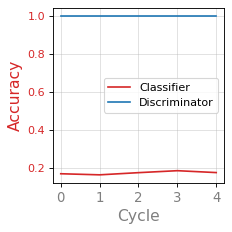

In [13]:
R.plot()

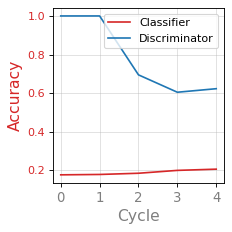

In [16]:
R.plot()

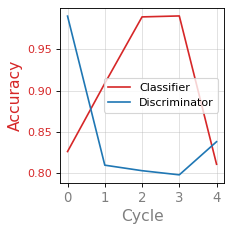

In [17]:
R.plot()